# Developing model to predict Heart disease using Classification Algorithms - (Support Vector Machine)

In [1]:
#Import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv('heart.csv')
#To see first 5 records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#TO see the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#To see the statistical information
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#To see how many rows and columns
df.shape

(303, 14)

In [6]:
#To see the columns in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#To see the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

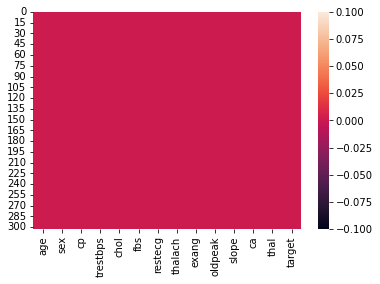

In [8]:
#To visualize the null values
sb.heatmap(df.isnull())
plt.show()

In [9]:
#To see the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
#To see the duplicates values present or not
df.duplicated().sum()

1

In [11]:
#To drop the duplicate value
df.drop_duplicates(inplace=True)

In [12]:
#To see the duplicates values present or not
df.duplicated().sum()

0

In [13]:
#Now here the target output is target which has category so we are using classification
#To see how many category are there in the target column
df['target'].unique()

array([1, 0], dtype=int64)

In [14]:
#To see how many values are there in 0 and 1
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

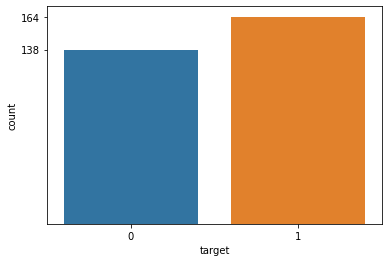

In [15]:
#To visualize the target column to see if output is balance or not
sb.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()
#As we can see that the difference is not more so the data is balance  here

In [16]:
#To select the input and output
X=df.drop('target',axis=1)
Y=df['target']

In [17]:
#To split the data in 70% training and 30% testing
#To import the class
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
#appling standardscaler on input 
#First import the class
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#To apply standard scaler on X_train,X_test
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
#To create the function
#For classification_report and confusion_matrix
from sklearn.metrics import classification_report,plot_confusion_matrix
def Ml(model):
    #To train the data
    model.fit(X_train,Y_train)
    #To test the data
    Y_pred=model.predict(X_test)
    #To get the classifiaction_report
    print(classification_report(Y_test,Y_pred))
  #To get the confusion_report
    plot_confusion_matrix(model,X_test,Y_test)
    return model

# Logistic Algorithm

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



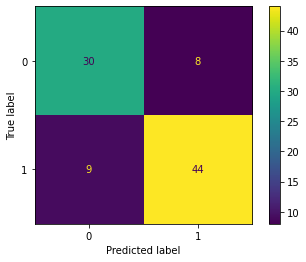

In [20]:
#To apply Logistics Regression
#First call the class
from sklearn.linear_model import LogisticRegression
#create the object
lr=LogisticRegression()
#Call the function using Logistics Regression function
lr=Ml(lr)


# Decision Tree Algorithm

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91



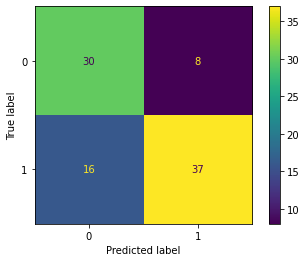

In [21]:
#As we know that the logisticregression does not select the features automatically
#So we are using DecisionTree algorithm to select the important features 
#It will also increase the accuracy
#To import DecisionTreeClass
from sklearn.tree import DecisionTreeClassifier
#create the object
dt=DecisionTreeClassifier(random_state=1)
#Call the dtc function
dt=Ml(dt)

In [22]:
#To see the information gain of each input
dict={'Features':X.columns,'Information gain':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('Information gain',ascending=False,ignore_index=True)

,Features,Information gain
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.76      0.77      0.77        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



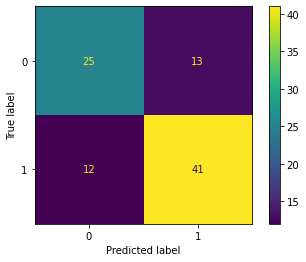

In [23]:
# Now as we can see that the accuracy is good but can be better due to overfitting so to reduce it
#we use purning technique
#1] max_depth using gini index
"""for i in range (8,0,-1):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Number of max_dpeth:",i)
    #Give it to the function
    dtc1=Ml(dtc1)
    dtc1"""
dtc1=DecisionTreeClassifier(random_state=1,max_depth=4)
#Give it to the function
dtc1=Ml(dtc1)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        38
           1       0.78      0.72      0.75        53

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.72        91



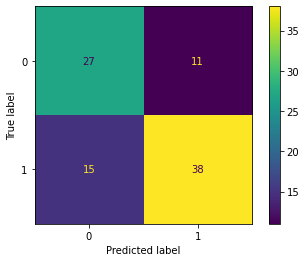

In [24]:
#Uisng max_depth using entropy
#1] max_depth using gini index
"""for i in range (8,0,-1):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print("Number of max_depth:",i)
    #Give it to the function
    dt1=Ml(dt1)
    dt1"""
dt1=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
#Give it to the function
dt1=Ml(dt1)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



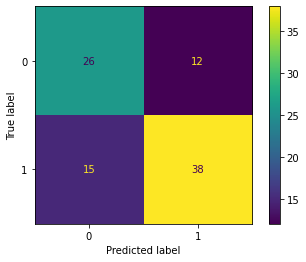

In [25]:
#Uinsg 2nd techinque of purning i.e min_samples_leaf using gini index
"""for i in range(45,101,1):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print ("No of sample leaf:",i)
    #call the function
    dt2=Ml(dt2)"""
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call the function
dt2=Ml(dt2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



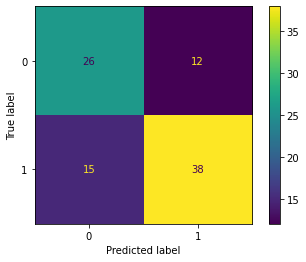

In [26]:
#Uinsg 2nd techinque of purning i.e min_samples_leaf using entropy
""""for i in range(45,101,1):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print ("No of sample leaf:",i)
    #call the function
    dt2=Ml(dt2)"""
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
#call the function
dt2=Ml(dt2)

In [27]:
#Conclusion:From purning method using both methods in gini and entropy
#Below is the accuracy of all the purning technique algorithm
#max_depth using gini index :77% at max_depth-4
#max_depth using entropy :72% at max_depth-4
#min_sample_leaf using gini index:72% at min_sample leaf-45
#min_sample_leaf using entropy: 72% at min _sample_leaf-45
#So as per the report till now the best algorithm is DecisionTree using  max_depth entropy

# Ensembling Technique (Random Fores Tree)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91



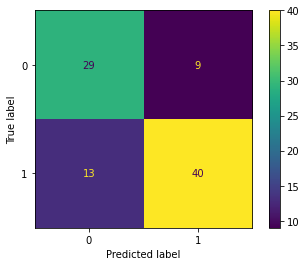

In [28]:
#Now we are using ensembling technique to the dataset:
#First ensembling technique is RandomForestTree
#calling the RandomForestTree class using gini index
from sklearn.ensemble import RandomForestClassifier
"""for i in range(13,0,-1):
#creating the object
    rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=i)
    print("features:",i)
    #calling the function
    rfc=Ml(rfc)"""
#Using trial and heat method we are getting highest accuracy of Rfc at max_features=5 in rfc gini index
rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=5)
#calling the function
rfc=Ml(rfc)


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.84      0.79      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



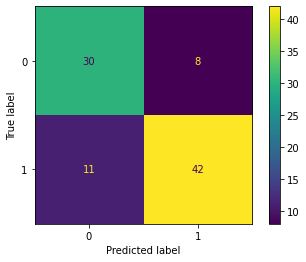

In [29]:
#calling the RandomForestTree class using entropy
from sklearn.ensemble import RandomForestClassifier
"""for i in range(1,19):
#creating the object
    rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=i,criterion='entropy')
    print("features:",i)
    #calling the function
    rfc=Ml(rfc)"""

rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=4,criterion='entropy')
#calling the function
rfc=Ml(rfc)


In [30]:
#Conclusion after applying randomforestclassifier with both gini index and entropy
#We are getting very less accuarcy 
#using randonforestclassifier wih gini index:1-75%,0-76% at max_feature=5
#using randonforestclassifier wih entropy:1-79%,0-79% at max_features=4

# Ada Boost (Adaptor Boosting)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



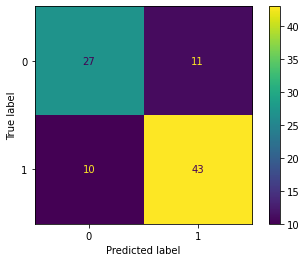

In [31]:
#Now we are using boosting methods:
#First using ada boost
#calling the class
from sklearn.ensemble import AdaBoostClassifier
"""#To create the object
for i in range(13,0,-1):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of stumps:",i)
    #call the function
    ada=Ml(ada)"""
ada=AdaBoostClassifier(n_estimators=6,random_state=1)
#call the function
ada=Ml(ada)

# Gradient Boosting

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



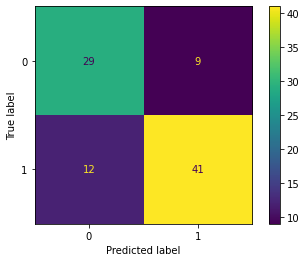

In [32]:
#Now we are using gradient boost
#First call the class
from sklearn.ensemble import GradientBoostingClassifier
"""#create the object
for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("Number of estimators :",i)
    #call the function
    gbc=Ml(gbc)"""
gbc=GradientBoostingClassifier(n_estimators=21,random_state=1)
#call the function
gbc=Ml(gbc)

# Extreme Gradient Boosting

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



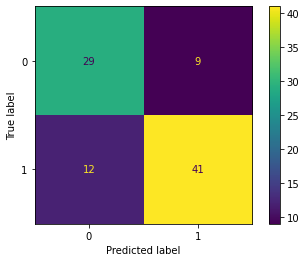

In [33]:
#Using EXtreme Gradient Boosting
from xgboost import XGBClassifier
"""#creating the object
for i in range(10,101):
    xgb=XGBClassifier(random_state=1,reg_alpha=1,n_estimators=i)
    print("Number of estimators :",i)
    #call the function
    xgb=Ml(xgb)"""
xgb=XGBClassifier(random_state=1,reg_alpha=1,n_estimators=10)
#call the function
xgb=Ml(xgb)

# Support Vector Machine

In [34]:
#Using SupportVectorClassifier
from sklearn.svm import LinearSVC
#LinearSVC means Linear support vector classifier

In [35]:
#create the object
svc=LinearSVC(random_state=1)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



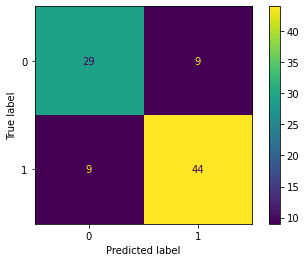

In [36]:
#call the function
svc=Ml(svc)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



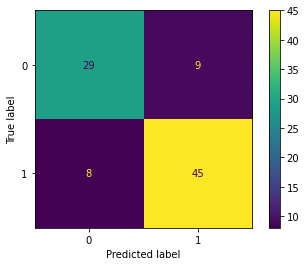

In [37]:
#create object of LinearSVC class and add external error
svc1=LinearSVC(random_state=1,C=0.10)
#Call the function
svc1=Ml(svc1)

In [38]:
#As we got almost same accuracy after adding error too
#So we can say that the data is linear separable
#But then too cross checking it with hyperparrameters

In [39]:
#There are two svc hyperparameters
#1.Polynomial kernel
#2.Radail Basis kernel

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



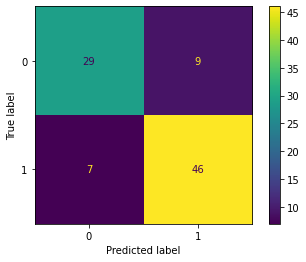

In [40]:
#Using Polynomial Kernel
#Svc is used for both polynomial and radial basis kernel function:both are used for non linear
from sklearn.svm import SVC
#create the object of SVC passing the poly in kernel parameter
polysvc=SVC(random_state=1,kernel='poly')
#Call the function
polysvc=Ml(polysvc)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



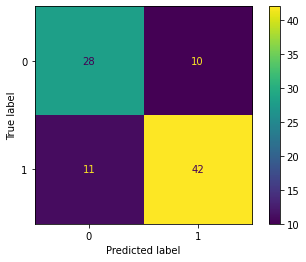

In [41]:
#create the object of SVC passing the radial basis in the kernel parameter
radialsvc=SVC(random_state=1,kernel='rbf')
#call the function
radialsvc=Ml(radialsvc)

In [42]:
#Conclusion:So after applying all the algorithm 
#We can say that Svm using polynomial kernel function is the best algorithm for this dataset at accuracy 87% of 1 and 0 76%